<a href="https://colab.research.google.com/github/GDSC-PolSl/ML-Sessions-01/blob/main/Introduction%20to%20ML%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Sessions 01 | Introduction to Machine Learning with Python
## Agenda
1. What is Machine Learning?
2. Machine Learning Concepts & Terminology
3. Hands-on Exercise: Implementing Cost and Gradient Descent Functions
4. Regression Exercises
5. Classification Exercises
6. Further Resources


# What is Machine Learning | Google Cloud
Machine learning is a subset of artificial intelligence that enables a system to autonomously learn and improve using neural networks and deep learning, without being explicitly programmed, by feeding it large amounts of data.

Machine learning allows computer systems to continuously adjust and enhance themselves as they accrue more “experiences.” Thus, the performance of these systems can be improved by providing larger and more varied datasets to be processed.

## How does ML work?

Machine learning works by training algorithms on sets of data to achieve an expected outcome such as identifying a pattern or recognizing an object. Machine learning is the process of optimizing the model so that it can predict the correct response based on the training data samples.

## Types of Machine Learning
**Supervised learning** is a machine learning model that uses labeled training data (structured data) to map a specific feature to a label. In supervised learning, the output is known (such as recognizing a picture of an apple) and the model is trained on data of the known output. In simple terms, to train the algorithm to recognize pictures of apples, feed it pictures labeled as apples.

**Unsupervised learning** is a machine learning model that uses unlabeled data (unstructured data) to learn patterns. Unlike supervised learning, the “correctness” of the output is not known ahead of time. Rather, the algorithm learns from the data without human input (and is thus, unsupervised) and categorizes it into groups based on attributes. For instance, if the algorithm is given pictures of apples and bananas, it will work by itself to categorize which picture is an apple and which is a banana. Unsupervised learning is good at descriptive modeling and pattern matching.

source: [Google Cloud Docs](https://cloud.google.com/learn/what-is-machine-learning)

# Machine Learning Concepts
1. **Label**
2. **Feature**
3. **Example**
4. **Model**
5. **Training**
6. **Inference** & **Prediction**
7. **Hyperparameters**


sources:

[ML Crashcourse by Google](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology)

[Google for Developers ML GLossary](https://developers.google.com/machine-learning/glossary)

# Hands-on Exercise: Implementing Cost and Gradient Descent Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
x = data['Population'].values
y = data['Profit'].values
m = len(y)

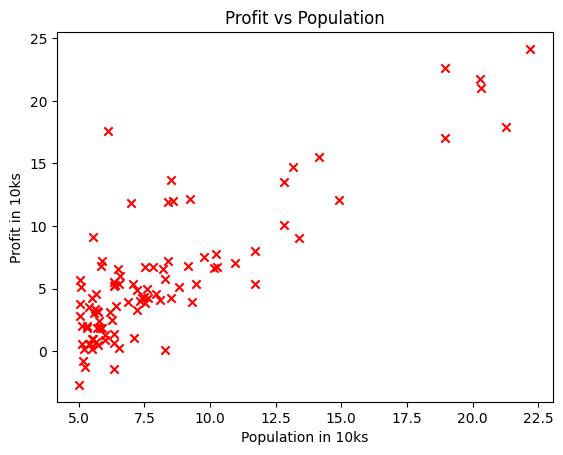

In [ ]:
plt.scatter(x, y, c='red', marker='x')
plt.ylabel('Profit in 10ks')
plt.xlabel('Population in 10ks')
plt.title('Profit vs Population')

plt.show()

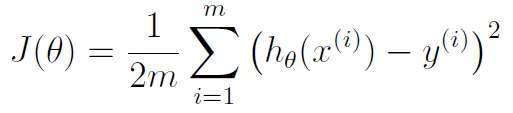

In [ ]:
X = np.append(np.ones([m,1]), x.reshape(m,1), axis=1)
y = y.reshape(m,1)

theta = np.zeros([2,1])

In [ ]:
def compute_cost(X, y, theta):
  # Length of the dataset
  m = len(y)

  # Hypothesis: dot product of X and theta
  predictions = X.dot(theta)
  squared_error = (predictions - y)**2
  J = 1/(2*m)*(np.sum(squared_error))

  return J

In [ ]:
cost = compute_cost(X, y, theta)
print("Current cost", cost)

Current cost 32.072733877455676


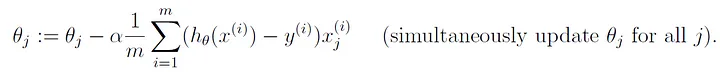

In [ ]:
def gradient_descent(X, y, theta, alpha, iter):
  history = []

  m = len(y)

  for i in range(iter):
    h = X.dot(theta)
    theta = theta - (alpha/m)*(X.T.dot(h-y))

    history.append(compute_cost(X, y, theta,))

  return theta, history

In [ ]:
# Iterations (training rounds)
iters = 1500

# Learning rate
alpha = 0.01

new_theta, history = gradient_descent(X, y, theta, alpha, iters)
print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


In [ ]:
new_cost = compute_cost(X, y, new_theta)
print(new_cost)

4.483388256587725


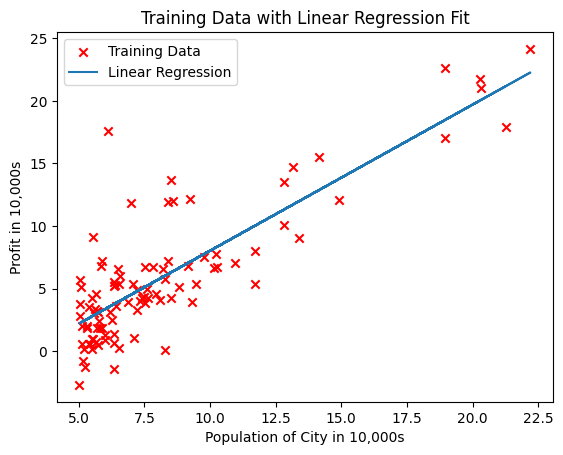

In [ ]:
plt.scatter(X[:,1].reshape([m,1]),y, c='red', marker='x', label='Training Data')
plt.plot(X[:,1].reshape([m,1]), np.dot(X, new_theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')
plt.show()

# Hands-on Regression Exercises

In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [ ]:
# View X and y shapes
print(X.shape, y.shape)

(20640, 8) (20640,)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5558915986952422


In [ ]:
import matplotlib.pyplot as plt

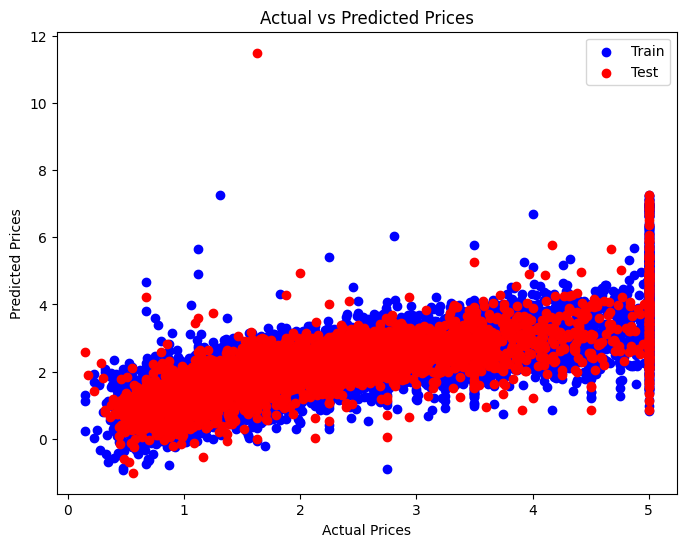

In [ ]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_pred, color='red', label='Test')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Abalone dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
data = pd.read_csv(url, names=column_names)

# Convert categorical variable into dummy/indicator variables
data = pd.get_dummies(data)

# Define predictors and target variable
X = data.drop("Rings", axis=1)
y = data["Rings"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.089339114832536
R-squared: 0.5298623219859746
